In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def y(x):
    return 3*x**2-4*x+5

In [3]:
xs=np.arange(-6,6,0.25)
xs

array([-6.  , -5.75, -5.5 , -5.25, -5.  , -4.75, -4.5 , -4.25, -4.  ,
       -3.75, -3.5 , -3.25, -3.  , -2.75, -2.5 , -2.25, -2.  , -1.75,
       -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,
        0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,  2.5 ,  2.75,
        3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,  4.5 ,  4.75,  5.  ,
        5.25,  5.5 ,  5.75])

In [4]:
ys=y(xs)
ys

array([137.    , 127.1875, 117.75  , 108.6875, 100.    ,  91.6875,
        83.75  ,  76.1875,  69.    ,  62.1875,  55.75  ,  49.6875,
        44.    ,  38.6875,  33.75  ,  29.1875,  25.    ,  21.1875,
        17.75  ,  14.6875,  12.    ,   9.6875,   7.75  ,   6.1875,
         5.    ,   4.1875,   3.75  ,   3.6875,   4.    ,   4.6875,
         5.75  ,   7.1875,   9.    ,  11.1875,  13.75  ,  16.6875,
        20.    ,  23.6875,  27.75  ,  32.1875,  37.    ,  42.1875,
        47.75  ,  53.6875,  60.    ,  66.6875,  73.75  ,  81.1875])

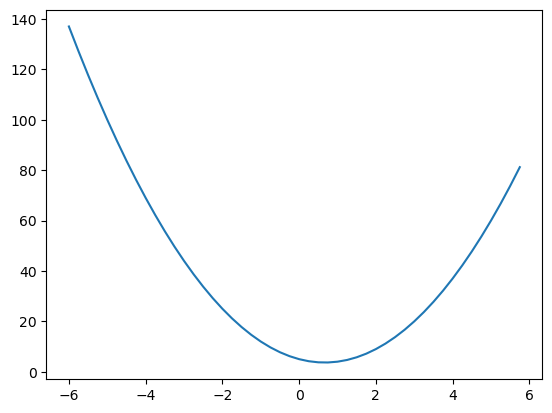

In [5]:
plt.plot(xs,ys)

In [6]:
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [7]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

#d1 for fx and d2 for f(x+h)

d1 = a*b + c
c += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0
d2 4.0001
slope 0.9999999999976694


In [8]:
# lets bump b
d1 = a*b + c
b += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

# lets make the data structure for our use case

d1 4.0001
d2 4.0003
slope 2.0000000000042206


In [9]:
class Value:
  
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"
  
  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')
    
    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward
    
    return out

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')
    
    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
      
    return out
  
  def __pow__(self, other):
    assert isinstance(other, (int, float)), "only supporting int/float powers for now"
    out = Value(self.data**other, (self,), f'**{other}')

    def _backward():
        self.grad += other * (self.data ** (other - 1)) * out.grad
    out._backward = _backward

    return out
  
  def __rmul__(self, other): # other * self
    return self * other

  def __truediv__(self, other): # self / other
    return self * other**-1

  def __neg__(self): # -self
    return self * -1

  def __sub__(self, other): # self - other
    return self + (-other)

  def __radd__(self, other): # other + self
    return self + other

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    
    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward
    
    return out
  
  def exp(self):
    x = self.data
    out = Value(math.exp(x), (self, ), 'exp')
    
    def _backward():
      self.grad += out.data * out.grad # NOTE: in the video I incorrectly used = instead of +=. Fixed here.
    out._backward = _backward
    
    return out
  
  
  def backward(self):
    
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)
    
    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

In [10]:
t=Value(9)
t*3

Value(data=27)

In [11]:
t**2

Value(data=81)

In [12]:
t/3

Value(data=3.0)

In [13]:
3*t

Value(data=27)

In [14]:
a=Value(90)
b=Value(10)
print(a)
print(b)

Value(data=90)
Value(data=10)


In [15]:
c=a+b

In [16]:
c._prev

{Value(data=10), Value(data=90)}

In [17]:
d=a+b*c

In [18]:
d._prev,d._op

({Value(data=1000), Value(data=90)}, '+')

In [19]:
a=Value(2,label='a')
b=Value(-3,label='b')
c=Value(10,label='c')
e=a*b;e.label='e'
d=e+c;d.label='d'
f=Value(-2.0,label='f')
L=d*f;L.label="L"
L

Value(data=-8.0)

In [20]:
from graphviz import Digraph
# lets make a graph
def trace(root):
    nodes,edges=set(),set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
        for child in v._prev:
            edges.add((child,v))
            build(child)
    build(root)
    return nodes,edges
    
def draw_dot(root):
    dot=Digraph(format="svg",graph_attr={'rankdir':'LR'})
    nodes,edges=trace(root)
    for n in nodes:
        uid=str(id(n))
        dot.node(name=uid,label="{ %s |data %.4f| grad %.4f}" % (n.label,n.data,n.grad),shape="record")
        if n._op:
            dot.node(name=uid+n._op,label=n._op)
            dot.edge(uid+n._op,uid)
    for n1,n2 in edges:
        dot.edge(str(id(n1)),str(id(n2))+n2._op)
    return dot


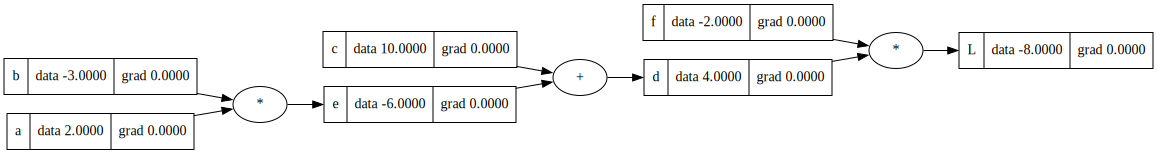

In [21]:
draw_dot(L)

In [22]:
L.grad=1
f.grad=4
d.grad=-2

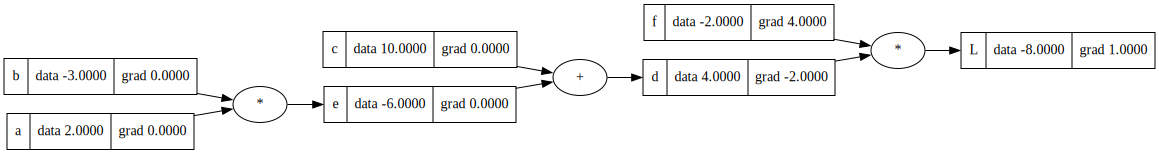

In [23]:
draw_dot(L)

In [24]:
e.grad=-2.0
c.grad=-2.0

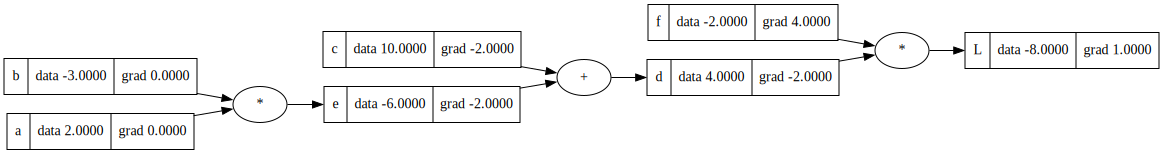

In [25]:
draw_dot(L)

In [26]:
a.grad=6.0
b.grad=-4.0

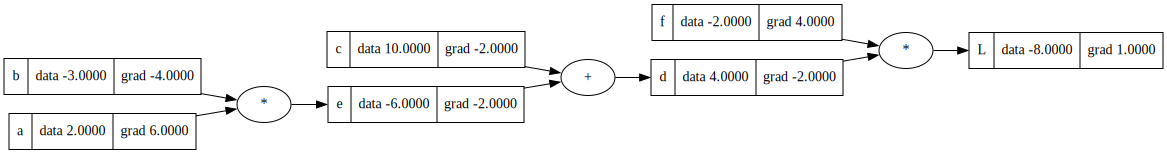

In [27]:
draw_dot(L)

In [28]:
a.data+=0.01*a.grad
b.data+=0.01*b.grad
c.data+=0.01*b.grad
f.data+=0.01*f.grad

e=a*b
d=e+c

L=d*f
print(L.data)

-7.247296


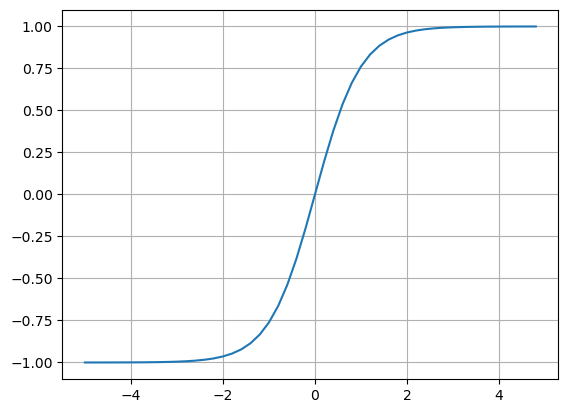

In [29]:
plt.plot(np.arange(-5,5,0.2),np.tanh(np.arange(-5,5,0.2)));
plt.grid();

In [30]:
#inputs
x1=Value(12.0,label='x1')
x2=Value(0.0,label='x2') 
#weights
w1=Value(-3.0,label="w1")
w2=Value(1.0,label='w2')
#bias of a neuron
b = Value(6.8813735870195432,label='b')
x1w1=x1*w1;x1w1.label="x1w1"
x2w2=x2*w2;x2w2.label="x2w2"
x1w1x2w2=x1w1+x2w2;x1w1x2w2.label="x1w1x2w2"
n=x1w1x2w2+b;n.label="n"
o=np.tanh(n);o.label="o"

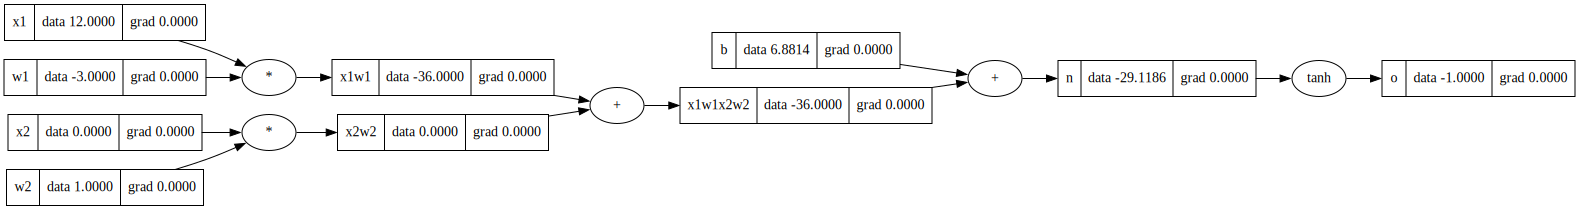

In [31]:
draw_dot(o)

In [32]:
o.grad=1
n.grad=0.5 #1-tanh**2

In [33]:
b.grad=0.5
x1w1x2w2.grad=0.5

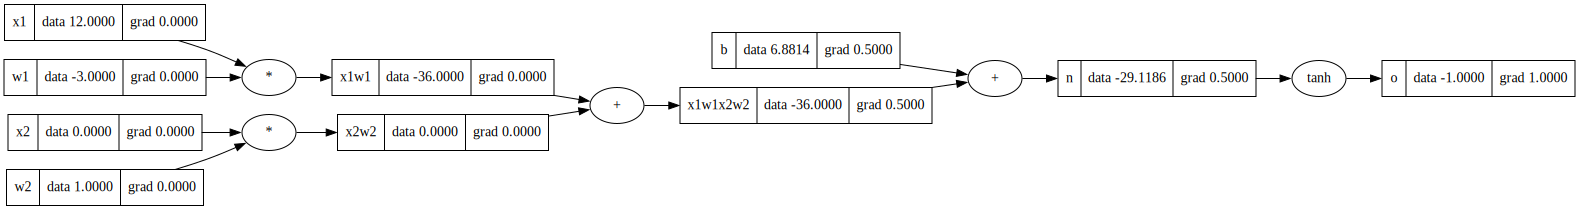

In [34]:
draw_dot(o)

In [35]:
x1w1.grad=0.5
x2w2.grad=0.5

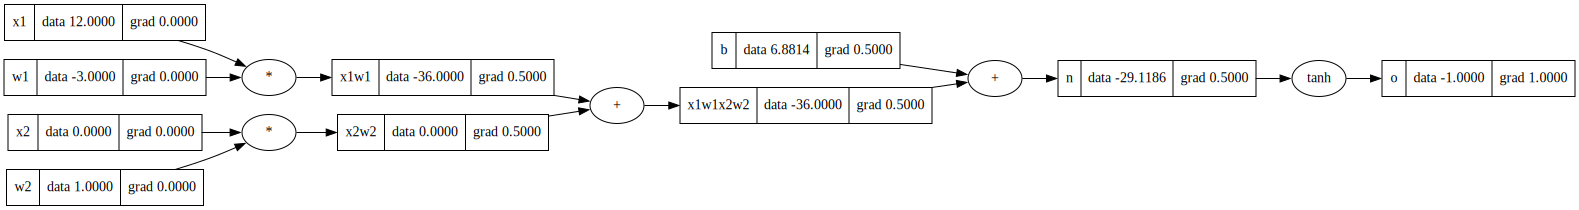

In [36]:
draw_dot(o)

In [37]:
x1.grad=x1w1.grad*w1.data
w1.grad=x1w1.grad*x1.data

In [38]:
x2.grad=x2w2.grad*w2.data
w2.grad=x2w2.grad*x2.data

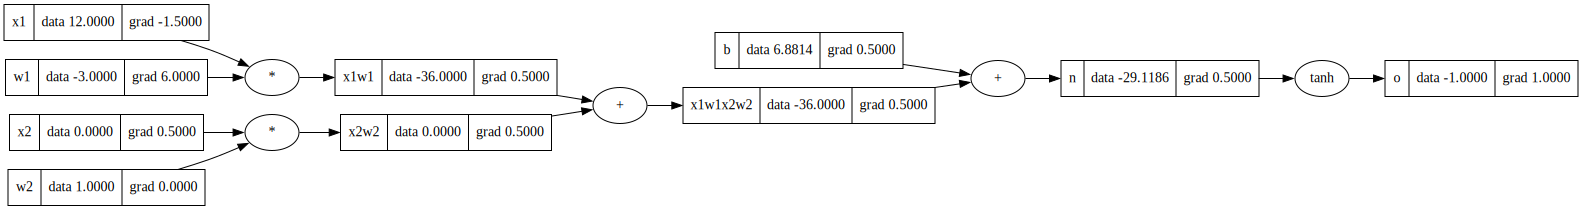

In [39]:
draw_dot(o)


# now that we made _backward function we dont have to make gradient by hand any more

In [40]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

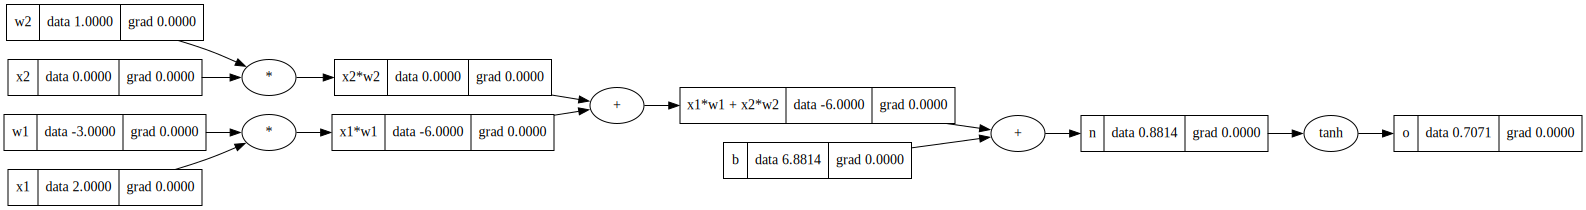

In [41]:
draw_dot(o)

# and know lets try it using the function inside the class which is backward

In [42]:
o.backward()

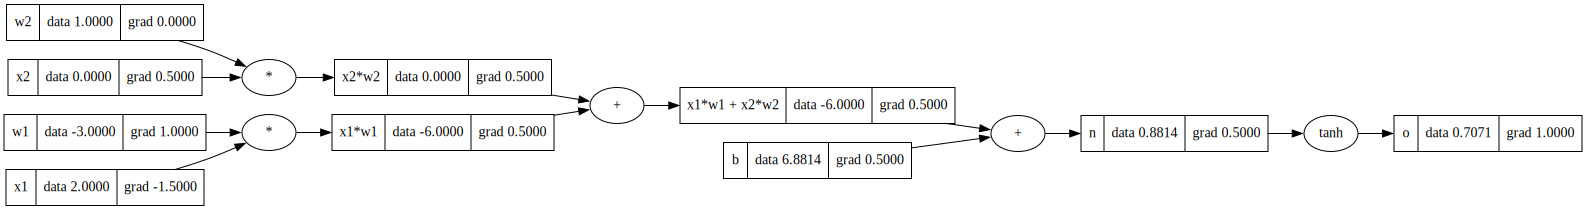

In [43]:
draw_dot(o)

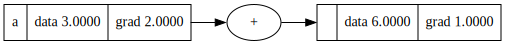

In [44]:
a=Value(3.0,label="a")
b=a+a
b.backward()
draw_dot(b)

In [45]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
#__
e=(2*n).exp();e.label="e"
o = (e-1)/(e+1);o.label="o"
#__
o.backward()

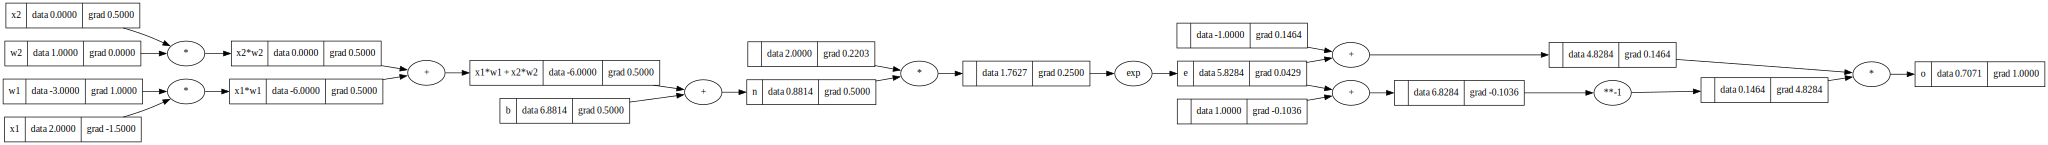

In [46]:
draw_dot(o)

# pytorch part

In [47]:
import torch

In [48]:
a=torch.Tensor([2.0]).double() ;a.requires_grad=True

In [49]:
a

tensor([2.], dtype=torch.float64, requires_grad=True)

In [50]:
x1 = torch.Tensor([2.0]).double()                ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()                ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()               ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()                ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double()  ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

In [51]:
o

tensor([0.7071], dtype=torch.float64, grad_fn=<TanhBackward0>)

In [52]:
#lets perform some operation here
o.backward()
print("w2",x2.grad.item())
print("x2",w2.grad.item())
print("w1",w1.grad.item())
print("x1",x1.grad.item())

w2 0.5000001283844369
x2 0.0
w1 1.0000002567688737
x1 -1.5000003851533106


In [53]:
print(o.data.item())

0.7071066904050358


In [54]:
temp=np.random.uniform(-1,1,(3,2))
temp

array([[-0.31207881, -0.68779176],
       [ 0.65583318, -0.547671  ],
       [-0.69880009, -0.13339999]])

# out own custom neuron

In [55]:
import random

In [56]:
class Neuron:
    def __init__(self,nin):
        self.w=[Value(random.uniform(-1,1)) for _ in range(nin)] # the nn is the number of neurons and returns list of weights
        self.b=Value(random.uniform(-1,1))
    def __call__(self,x):
        temp=sum((wi*xi for wi,xi in zip(self.w,x)),self.b)
        out=temp.tanh()
        return out
    def parameters(self):
        return self.w+[self.b]
        
class Layer:
    def __init__(self,nin,nout):
        self.neurons=[Neuron(nin) for _ in range(nout)] #nin is the number of inputs to the N.N and 
    def __call__(self,x):
        outs=[n(x) for n in self.neurons]
        return outs[0] if len(outs)==1 else outs
        
    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]
        '''
        param=[]
        for neuron in self.neurons:
            ps=neuron.parameters()
            param.extened(ps)
        return param
        '''
class MLP:
    def __init__(self,nin,nouts):
        sz=[nin]+nouts
        self.layers=[Layer(sz[i],sz[i+1]) for i in range(len(nouts))]
    def __call__(self,x):
        for layer in self.layers:
            x=layer(x)
        return x
    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

In [57]:
x=[]
x.extend([10,23,34])
x

[10, 23, 34]

In [58]:
x=[2.0,4.0,-3.0]
n=MLP(3,[3,4,1])
n(x)

Value(data=-0.5315944500757996)

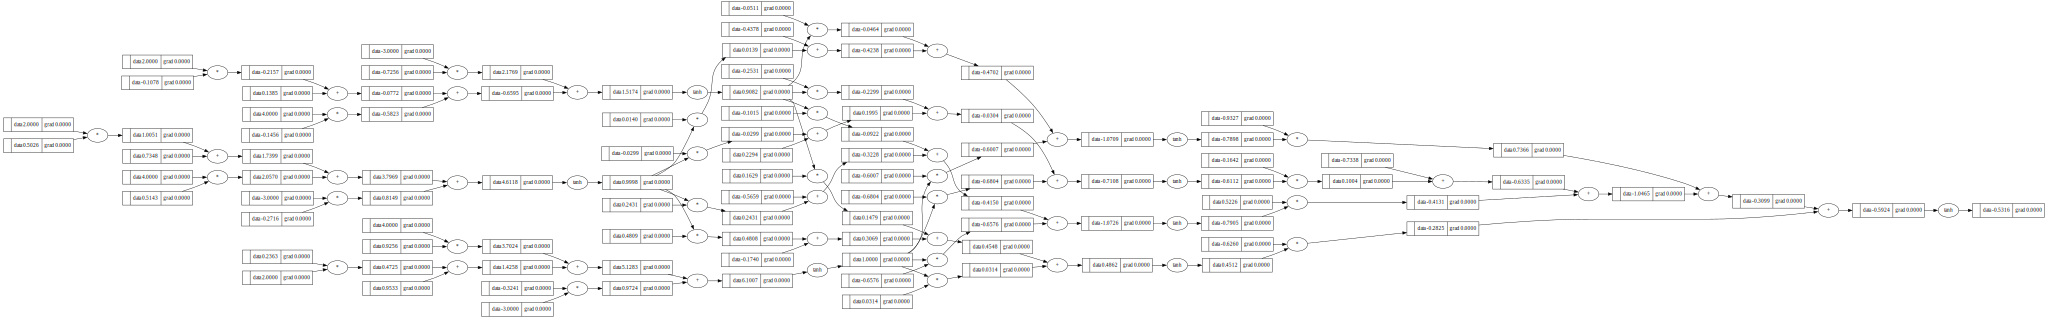

In [59]:
draw_dot(n(x))

In [60]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] 

In [61]:
y_pred=[n(x) for x in xs]
y_pred

[Value(data=-0.5011478433890485),
 Value(data=-0.5265037190928492),
 Value(data=-0.43983966562305826),
 Value(data=-0.5127031758975467)]

In [62]:
[(y_pred-y_true)**2 for y_pred,y_true in zip(y_pred,ys)]

[Value(data=2.253444847711591),
 Value(data=0.22419872803290344),
 Value(data=0.31377960020928714),
 Value(data=2.288270898370524)]

In [63]:
loss=sum([(y_pred-y_true)**2 for y_pred,y_true in zip(y_pred,ys)])

In [64]:
loss

Value(data=5.079694074324306)

In [65]:
loss.backward()

In [66]:
n.layers[0].neurons[0].w[0]

Value(data=0.5025501614493839)

In [67]:
n.layers[0].neurons[0].w[0].grad

-0.06037728281549076

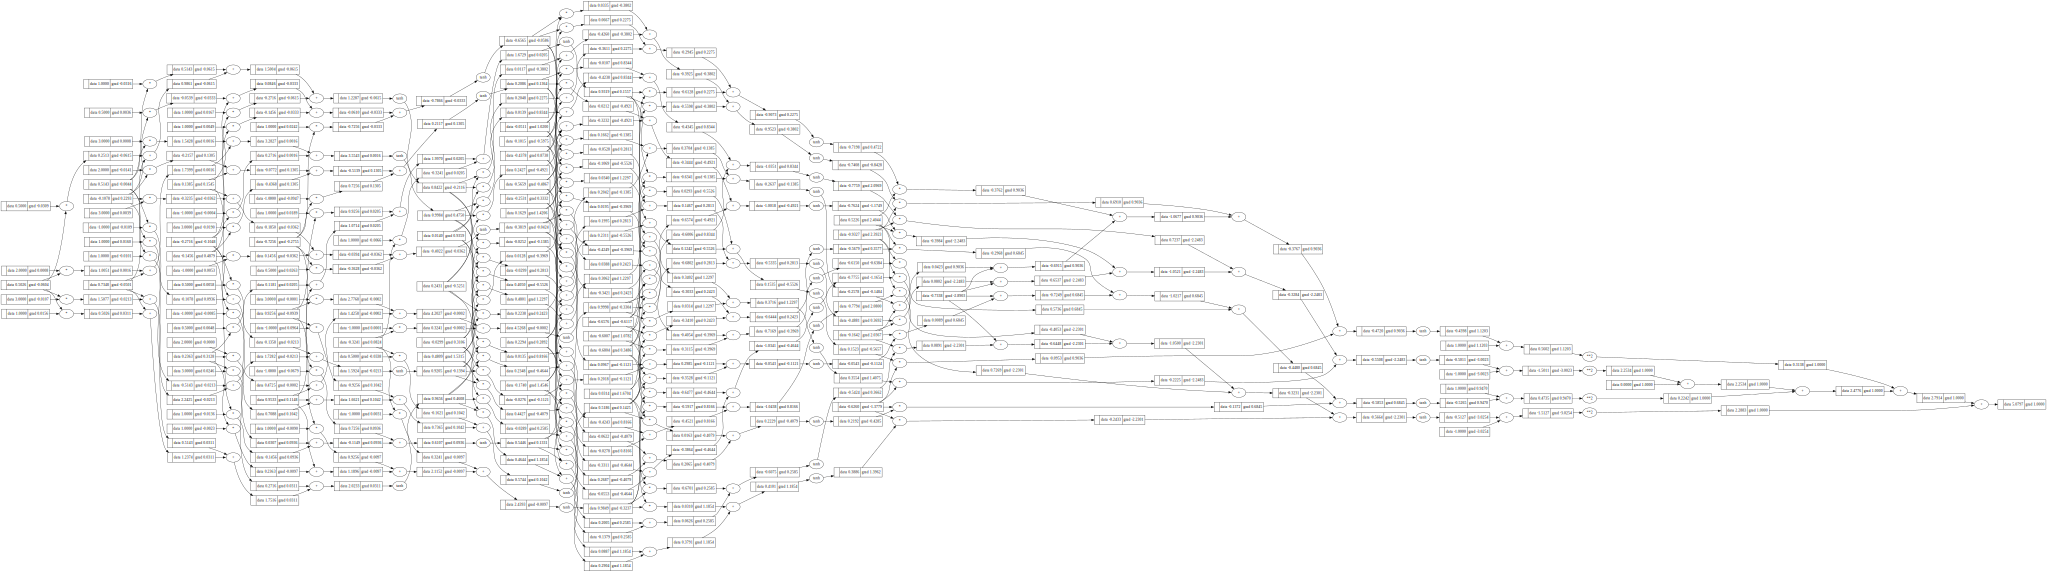

In [68]:
draw_dot(loss)

In [69]:
x=[2.0,4.0,-3.0]
n=MLP(3,[4,4,1])
n(x)

Value(data=0.6431495840182663)

In [70]:
n.parameters()

[Value(data=0.6509877411857927),
 Value(data=-0.09813531770162642),
 Value(data=0.29764918538077034),
 Value(data=0.8961454841995311),
 Value(data=-0.7291602516981899),
 Value(data=0.6897414378269782),
 Value(data=0.35606263688002904),
 Value(data=0.07694817431911516),
 Value(data=0.16898213250635963),
 Value(data=-0.7386353199220452),
 Value(data=0.9134440458729514),
 Value(data=0.248583636912997),
 Value(data=-0.8078821541077363),
 Value(data=-0.8153116582546185),
 Value(data=-0.26097902305205123),
 Value(data=0.3304686388858189),
 Value(data=-0.5987042166937184),
 Value(data=-0.25626450139413337),
 Value(data=-0.8167823226808619),
 Value(data=0.40760138484796515),
 Value(data=0.9998311607836448),
 Value(data=-0.5366129679185638),
 Value(data=-0.6111395172066463),
 Value(data=-0.624046581122961),
 Value(data=-0.6009508827059111),
 Value(data=0.1547083380954064),
 Value(data=0.9372038198942063),
 Value(data=-0.6122553574426215),
 Value(data=-0.1408640449993086),
 Value(data=0.28614208

In [71]:
n=MLP(3,[3,4,1])

In [72]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] 

# lets try to outmate the update of the parameters with loops

In [73]:
#loop it...
for i in range(20):
    
    #this is the forward pass
    y_pred=[n(x) for x in xs]
    loss=sum([(y_pred-y_true)**2 for y_pred,y_true in zip(y_pred,ys)])
    
    #this is the backward pass
    for p in n.parameters(): 
        p.grad=0.0  # we are flashing the neuroal network
        
    loss.backward()

    #this is the update
    for p in n.parameters():
        p.data+= -0.1*p.grad
    print(i,loss.data)

0 7.852644521162893
1 7.7158852850234245
2 7.484933728502569
3 6.81446074429955
4 3.579421308299005
5 0.5573135742130132
6 0.09732130835421535
7 0.07190148837259476
8 0.05766156953390733
9 0.048327142644226974
10 0.04165835520776246
11 0.036625447465881034
12 0.03267905091120028
13 0.029495588195503568
14 0.026870497273587913
15 0.024667395425967503
16 0.02279150799712838
17 0.02117474716687976
18 0.019766842536910318
19 0.018529819709668598


# COMPLETE